# Qualitative Two Development Lab

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from explorer.bivariate import QualitativeTwo

In [2]:
filepath = "data/Credit Score Classification Dataset.csv"
df = pd.read_csv(filepath)
a = "Education"
b = "Credit Rating"
c = "Income"
q = QualitativeTwo(data=df)
df[a] = df[a].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             164 non-null    int64   
 1   Gender          164 non-null    object  
 2   Income          164 non-null    int64   
 3   Education       164 non-null    category
 4   Marital Status  164 non-null    object  
 5   Children        164 non-null    int64   
 6   Own             164 non-null    object  
 7   Credit Rating   164 non-null    object  
dtypes: category(1), int64(3), object(4)
memory usage: 9.5+ KB


In [3]:
df[c].dtype in (str,float)

False

## Describe

In [4]:
q.describe(a=a,b=b)

Credit Rating                     
                            count unique      top freq
Education                                             
Associate's Degree             25      3  Average   15
Bachelor's Degree              42      2     High   27
Doctorate                      31      2     High   30
High School Diploma            30      3     High   15
Master's Degree                36      1     High   36

In [5]:
q.describe(a=a,b=c)

Income                                                     \
                     count       mean       std       min       25%       50%   
Education                                                                       
Associate's Degree   25.00  60,800.00 32,617.74 30,000.00 45,000.00 47,500.00   
Bachelor's Degree    42.00  79,404.76 28,363.98 50,000.00 60,625.00 67,500.00   
Doctorate            31.00  87,838.71 13,309.39 65,000.00 78,750.00 85,000.00   
High School Diploma  30.00  79,583.33 44,246.97 25,000.00 37,500.00 71,250.00   
Master's Degree      36.00 104,777.78 24,017.69 75,000.00 87,500.00 97,500.00   

                                           
                           75%        max  
Education                                  
Associate's Degree   57,500.00 127,500.00  
Bachelor's Degree    94,375.00 150,000.00  
Doctorate            92,500.00 120,000.00  
High School Diploma 128,750.00 142,500.00  
Master's Degree     112,500.00 162,500.00

## Frequency

In [6]:
q.frequency(a=a,b=b)

Credit Rating,Average,High,Low
Education,,,
Associate's Degree,15,5,5
Bachelor's Degree,15,27,0
Doctorate,1,30,0
High School Diploma,5,15,10
Master's Degree,0,36,0


In [7]:
g = df.groupby(a)[c].apply(np.array).values
r = stats.f_oneway(*g)
r.statistic

8.72858003081052

## Barplot

<Axes: xlabel='Education', ylabel='count'>

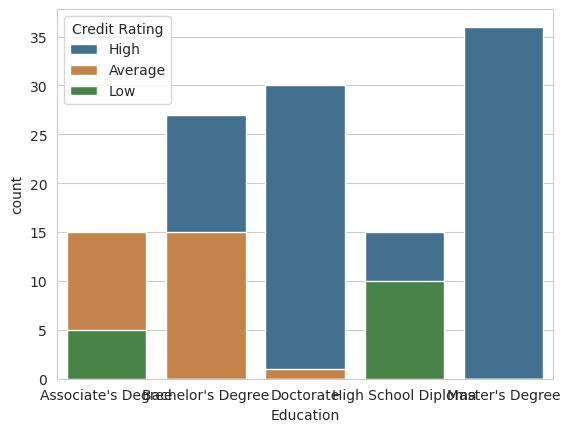

In [8]:
# vc = df[[a,c]].value_counts().reset_index(name="Count")
# vc
sns.countplot(data=df, x=a,hue=b,  saturation=0.5, dodge=False)


In [9]:
stats.contingency.crosstab(df[a].values, df[b].values)

CrosstabResult(elements=(array(["Associate's Degree", "Bachelor's Degree", 'Doctorate',
       'High School Diploma', "Master's Degree"], dtype=object), array(['Average', 'High', 'Low'], dtype=object)), count=array([[15,  5,  5],
       [15, 27,  0],
       [ 1, 30,  0],
       [ 5, 15, 10],
       [ 0, 36,  0]]))

In [10]:
def myfunc(a,b,f):
    print(a,b,f)

args = {'a':'a', "b": 'b', 'c': 'c'}
myfunc(**args)

TypeError: myfunc() got an unexpected keyword argument 'c'